# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.277820e+01     1.624367e+01
 * time: 0.0035848617553710938
     1     6.379217e+01     9.553384e+00
 * time: 0.010380029678344727
     2     5.718079e+01     1.043962e+01
 * time: 0.02619194984436035
     3     4.115206e+01     9.285968e+00
 * time: 0.12931489944458008
     4     3.018962e+01     8.035670e+00
 * time: 0.15148591995239258
     5     2.222989e+01     6.024926e+00
 * time: 0.17070889472961426
     6     1.773584e+01     5.699824e+00
 * time: 0.18735289573669434
     7     1.624314e+01     4.860774e+00
 * time: 0.20064902305603027
     8     1.304171e+01     3.998697e+00
 * time: 0.21706581115722656
     9     9.552598e+00     4.947499e+00
 * time: 0.23334193229675293
    10     8.647610e+00     2.294945e+00
 * time: 0.24924087524414062
    11     8.261188e+00     3.072441e+00
 * time: 0.3080728054046631
    12     7.707180e+00     2.510609e+00
 * time: 0.3215799331665039
    13     7.260095e+00     2.307617e+00
 * time

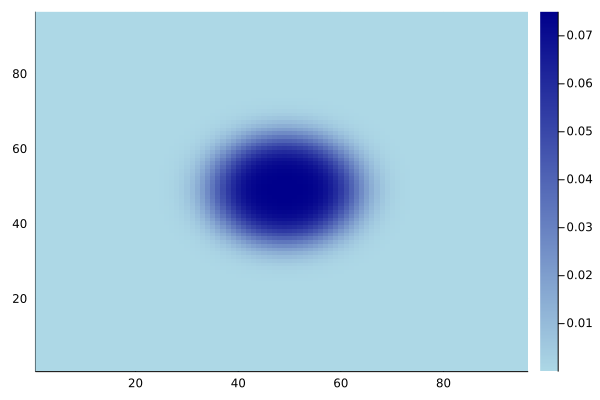

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))